In [1]:
import os
import pickle
import numpy as np
import skimage.io 
import skimage.transform 
import matplotlib.pyplot as plt

In [2]:
d = 128

In [3]:
path = 'RawImage/RawImage/TrainingData/'
train_data = np.zeros(shape=(5*len(os.listdir(path)), d, d))
j = 0
for i in os.listdir(path):
    x = skimage.io.imread(path+i, as_gray=True)
    x = skimage.transform.resize(x, (d, d))
    train_data[j, :, :] = x
    j += 1
    x1 = np.fliplr(x)
    x2 = np.flipud(x)
    train_data[j, :, :] = x1
    j += 1
    train_data[j, :, :] = x2
    j += 1
    x3 = skimage.transform.rotate(x, angle=np.random.randint(0, 90))
    x4 = skimage.transform.rotate(x, angle=np.random.randint(91, 180))
    train_data[j, :, :] = x3
    j += 1
    train_data[j, :, :] = x4
    j += 1

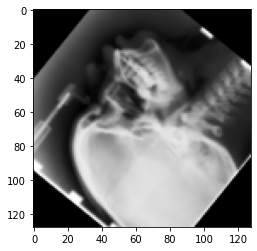

In [4]:
plt.imshow(x4, cmap='gray')

In [5]:
train_data.shape

(1600, 128, 128)

In [6]:
with open('Data/train_data_aug.pickle', "wb") as file:
    pickle.dump(train_data, file)

In [7]:
path = 'RawImage/RawImage/TestData/'
test_data = np.zeros(shape=(len(os.listdir(path)), d, d))
j = 0
for i in os.listdir(path):
    x = skimage.io.imread(path+i, as_gray=True)
    x = skimage.transform.resize(x, (d, d))
    test_data[j, :, :] = x
    j += 1

In [ ]:
test_data.shape

In [ ]:
with open('Data/test_data.pickle', "wb") as file:
    pickle.dump(test_data, file)